In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

5


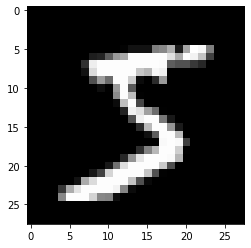

In [3]:
plt.imshow(X_train[0], "gray")
print(y_train[0])

In [4]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1, 28*28)

X_train.shape

(60000, 784)

In [5]:
X_train =  X_train / 255.0
X_test = X_test / 255.0

In [6]:
inputs = keras.Input(shape = (X_train.shape[1],))
x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

mdl = keras.Model(inputs = inputs, outputs = outputs)
mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs =  10)


Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2387 - accuracy: 0.9305
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0999 - accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0696 - accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0396 - accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0248 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0205 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.021

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train =  X_train / 255.0
X_test = X_test / 255.0
X_train.shape

(60000, 28, 28)

In [8]:
inputs = keras.Input(shape = X_train.shape[1:])
flatten = layers.Flatten()(inputs)
x = layers.Dense(128, activation="relu")(flatten)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

mdl = keras.Model(inputs = inputs, outputs = outputs)
mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.summary()
#mdl.fit(X_train, y_train, epochs =  10)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train =  X_train / 255.0
X_test = X_test / 255.0

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train.shape

(60000, 28, 28, 1)

In [ ]:
inputs = keras.Input(shape = X_train.shape[1:])
conv1 = layers.Conv2D(32, kernel_size=(3,3), activation="relu")(inputs)
pool1 = layers.MaxPool2D(pool_size=(2,2))(conv1)
conv2 = layers.Conv2D(16, kernel_size=(3,3), activation="relu")(pool1)
pool2 = layers.MaxPool2D(pool_size=(2,2))(conv2)
flatten = layers.Flatten()(pool2)
x = layers.Dense(128, activation="relu")(flatten)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

mdl = keras.Model(inputs = inputs, outputs = outputs)
mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
#mdl.summary()
mdl.fit(X_train, y_train, epochs =  10)

In [11]:
mdl.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0328 - accuracy: 0.9900


[0.03277917951345444, 0.9900000095367432]

In [ ]:
ypred  = mdl.predict(X_test)
ypred_label = np.argmax(ypred, axis =  1)

plt.figure(figsize = (16,8))

for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(X_test[i].reshape(28,28), "gray")
    plt.title(ypred_label[i])
    plt.axis("off")


True Label: 7
Predicted Label: 2


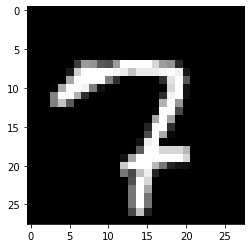

In [18]:
ix = ypred_label != y_test

plt.imshow(X_test[ix][0].reshape(28,28), "gray")
print("True Label:", y_test[ix][0])
print("Predicted Label:", ypred_label[ix][0])

In [ ]:
plt.bar(np.arange(10),ypred[ix][0])

In [33]:
new_model  = keras.Model(inputs = inputs, outputs = conv2)

features = new_model(X_test[1].reshape(1,28,28,1))

In [34]:
features.shape

TensorShape([1, 11, 11, 16])

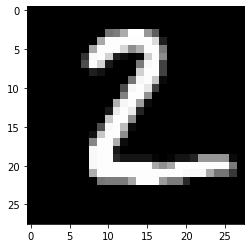

In [30]:
plt.imshow(X_test[1].reshape(28,28), "gray")

In [ ]:
plt.figure(figsize = (16,8))

for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(features[0,:,:,i], "gray")
    plt.axis("off")

In [36]:
mdl.save("model.keras")

In [ ]:
mdl2 = keras.models.load_model("model.keras")
mdl.summary()

In [40]:
mdl.save_weights("weights")

In [42]:
mdl3 = keras.Model(inputs = inputs, outputs =  outputs)
mdl3.load_weights("weights")